In [15]:
%matplotlib notebook
from colicoords import load, CellPlot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cells = load('temp_cells.hdf5')

In [3]:
res = cells.optimize()

<IPython.core.display.Javascript object>


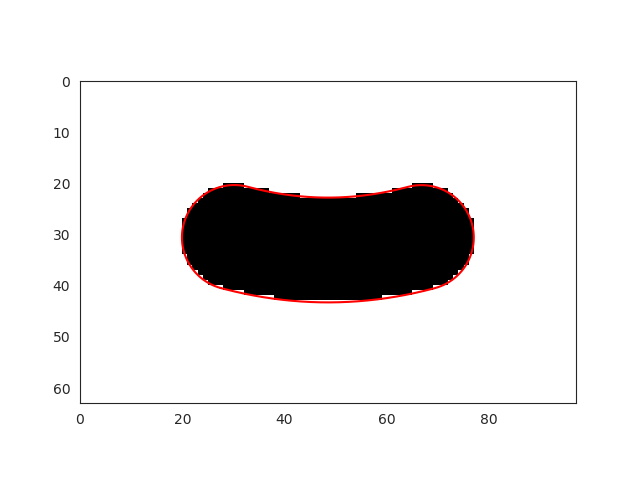

In [13]:
fig = plt.figure()
cp = CellPlot(cells[0])
cp.imshow('binary')
cp.plot_outline()

In [4]:
print(res)

[<symfit.core.fit_results.FitResults object at 0x7fc6ff0edeb8>, <symfit.core.fit_results.FitResults object at 0x7fc6ff0e3160>, <symfit.core.fit_results.FitResults object at 0x7fc6ff079780>, <symfit.core.fit_results.FitResults object at 0x7fc6ff0ed6d8>, <symfit.core.fit_results.FitResults object at 0x7fc6ff073048>, <symfit.core.fit_results.FitResults object at 0x7fc6ff0989b0>, <symfit.core.fit_results.FitResults object at 0x7fc6ff088860>, <symfit.core.fit_results.FitResults object at 0x7fc6ff07c048>, <symfit.core.fit_results.FitResults object at 0x7fc70e296cc0>, <symfit.core.fit_results.FitResults object at 0x7fc6ffd6ef28>, <symfit.core.fit_results.FitResults object at 0x7fc6ff0929b0>, <symfit.core.fit_results.FitResults object at 0x7fc6ff0eab38>, <symfit.core.fit_results.FitResults object at 0x7fc6ff0e3048>, <symfit.core.fit_results.FitResults object at 0x7fc6ff0850b8>, <symfit.core.fit_results.FitResults object at 0x7fc6ff0880f0>, <symfit.core.fit_results.FitResults object at 0x7fc6ff

In [5]:
obj_vals = [r.objective_value for r in res]

In [16]:
np.savetxt('test.txt', obj_vals)

In [8]:
print(res[0])


Parameter Value        Standard Deviation
a0        1.573854e+01 nan
a1        7.111813e-01 nan
a2        -7.331042e-03 nan
r         1.024605e+01 nan
xl        3.017839e+01 nan
xr        6.676413e+01 nan
Fitting status message: Optimization terminated successfully.
Number of iterations:   272
Regression Coefficient: 1.0



In [6]:
obj_vals

[array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.)]

In [ ]:
import numpy as np
import fastcluster as fc
from scipy.cluster.hierarchya import fcluster



def encode(arr):
    encode_arr = (200 * np.arange(len(arr)) + 1) ** 2
    return np.sum(arr * encode_arr)

def encode_intensity(cells):
    out_arr = np.empty(len(cells), dtype=int)
    for i, cell in enumerate(cells):
        intensity = cell.data.data_dict['storm_inner']['intensity']
        out_arr[i] = encode(intensity)

    return out_arr

def match_cells(gt_cells, m_cells, storm_input, filtered_binaries, max_d=5):
    
    
    img_numbers = np.array([int(re.findall(r'(\d+)', cell.name)[0]) for cell in m_cells])
    encoded_gt = encode_intensity(gt_cells[:9000])
    
    
    gt_matched, m_matched = []
    
    for i in np.unique(storm_input('frame')):  # Iteration starts at 1 (ImageJ indexing)
        st_elem = storm_input[storm_input['frame'] == i]
        X = np.array([st_elem['x'], st_elem['y']]).T.copy()
        linkage = fc.linkage(X)
        clusters = fcluster(cluster, max_d, criterion='distance')
        clustered_st = [st_elem[clusters == i] for i in np.unique(clusters)]
        encoded_storm = [encode(elem['intensity']) for elem in clustered_st]

        
        
        s_cells = m_cells[img_numbers == (i - 1)]
        coms_cells = [mh.center_of_mass(binary_img == j) for j in cell_numbers]
        binary_img = filtered_binaries[i - 1]
        cell_numbers = np.array([int(re.findall(r'(\d+)', cell.name)[1]) for cell in s_cells])
        
        for cluster, code in zip(clustered_storm, encoded_storm):
            
            # Find the GT cell
            idx_gt = np.argwhere(code == encoded_storm)
            if not idx_gt:
                print('Cluster not in cells, probably bordering cell')
                continue
            else:
                gt_cell = gt_cells[idx_gt]
            
            
            # Find the M cell
            com_storm = [np.mean(cluster['y']), np.mean(cluster['x'])]
            ds = np.sqrt((com[:, 0] - coms_storm[0])**2 + (com[:, 1] - coms_storm[1])**2)
            
            
            
            idx_m = np.argmin(ds)
            if np.min(ds) > 10:
                print('Too far away')
                continue
            else:
                m_cell = s_cells[idx_m]
                
            gt_matched.append(gt_cell)
            m_matched.append(m_cell)
                
    return gt_matched, m_matched
        
        